**Dataset** retrieved from: https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
# !pip3 install pandas_profiling --upgrade
# !pip3 install scikit-plot

Requirement already up-to-date: pandas_profiling in /usr/local/lib/python3.7/dist-packages (3.0.0)


In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from numpy import log, dot, e
from numpy.random import rand
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import scikitplot as skplt

In [ ]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      1   1     2       0

[303 rows x 14 columns]

<h3>Exploratory Data Analysis</h3>

Here we will be using pandas_profiling to generate a report on the whole dataset

In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

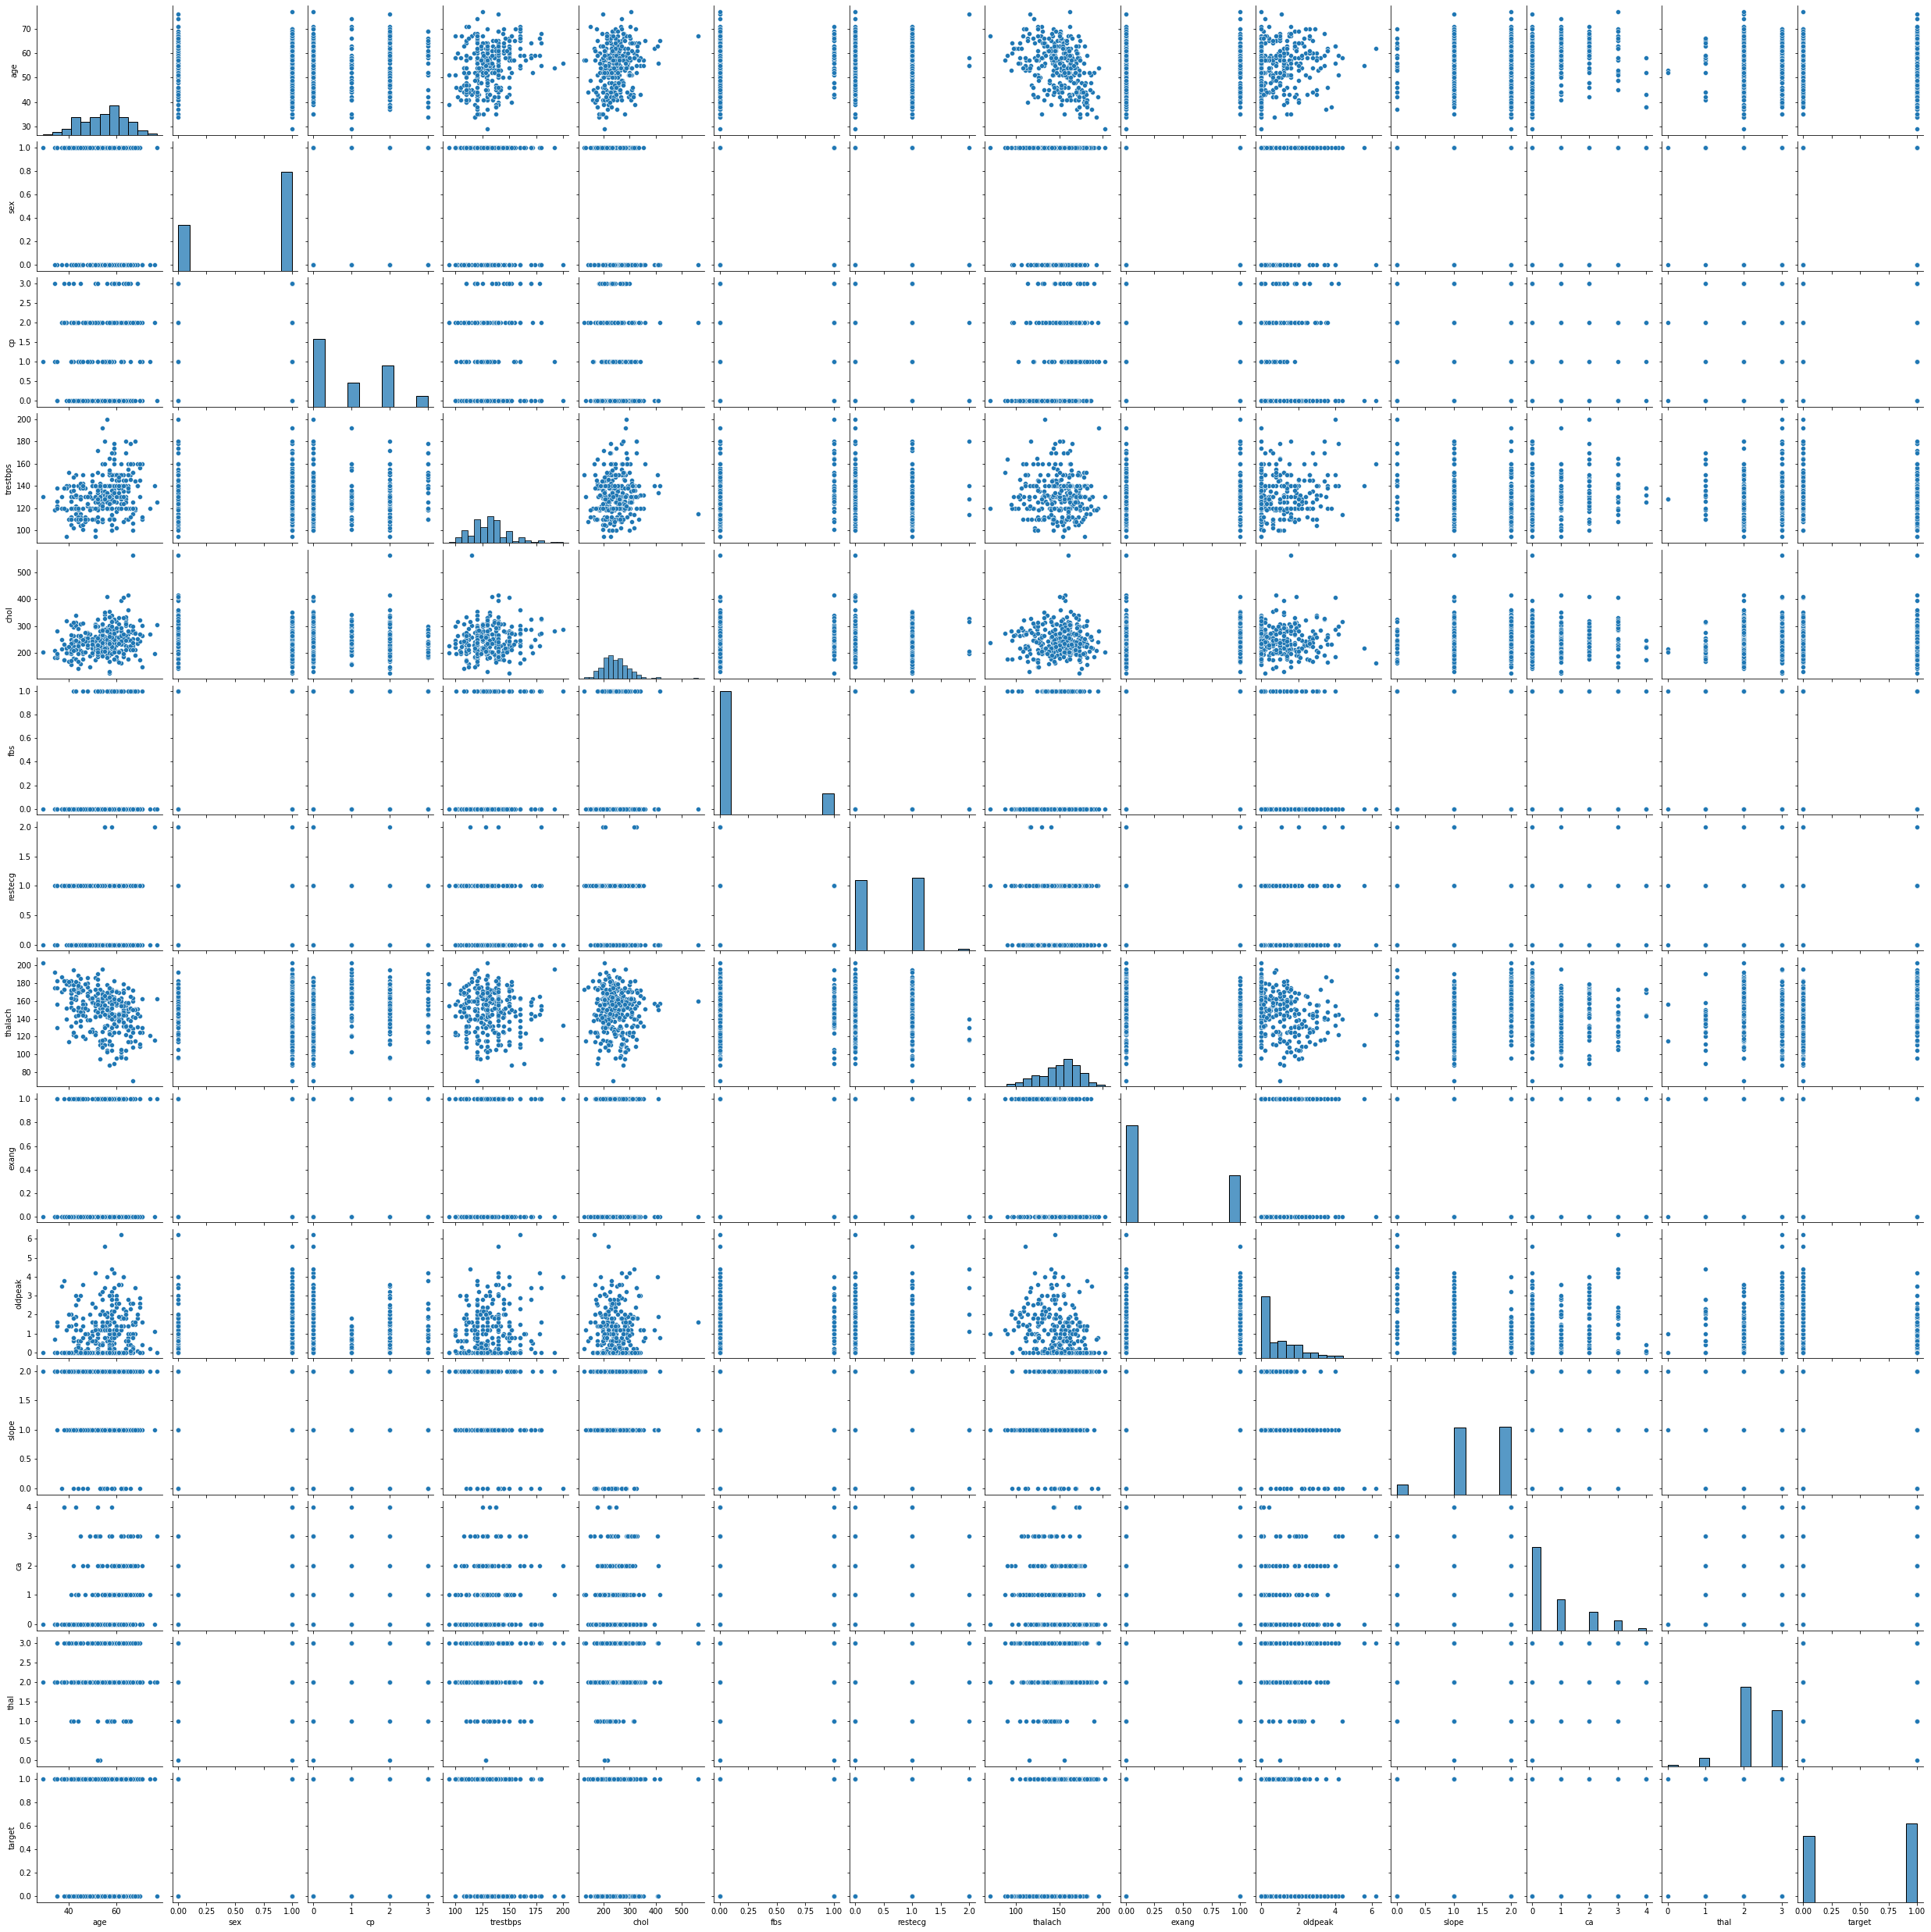

In [ ]:
sns.pairplot(df)

From the report above, it shows that the dataset has a duplicate line, so we can remove this.

In [ ]:
df = df.drop_duplicates()
df

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      1   1     2       0

[302 rows x 14 columns]

Here we will check how many rows have the target of 0 or 1

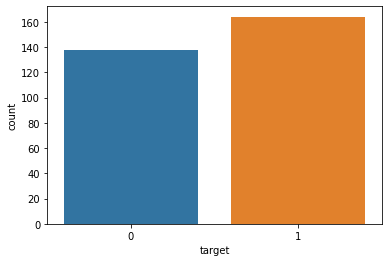

In [ ]:
sns.countplot(x="target", data=df)
plt.show()

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])

no = (countNoDisease / len(df.target))*100
yes = (countHaveDisease / len(df.target))*100

print(f'Do not have Heart Disease: {no:.2f}%')
print(f'Have Heart Disease: {yes:.2f}%')

Do not have Heart Disease: 45.70%
Have Heart Disease: 54.30%


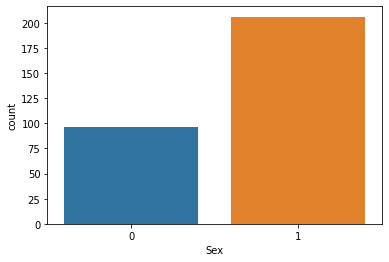

Female Patients:  31.79%
Male Patients:  68.21%
Number of Male patients: 96
Number of Female patients: 206


In [ ]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex")
plt.show()

countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])

female = countFemale / (len(df.sex))*100
male = countMale / (len(df.sex))*100
print(f'Female Patients: {female: .2f}%')
print(f'Male Patients: {male: .2f}%')
print(f"Number of Male patients: {countFemale}")
print(f"Number of Female patients: {countMale}")

Checking mean of data based on target

In [ ]:
df.groupby('target').mean()

age       sex        cp  ...     slope        ca      thal
target                                 ...                              
0       56.601449  0.826087  0.478261  ...  1.166667  1.166667  2.543478
1       52.585366  0.560976  1.371951  ...  1.591463  0.341463  2.121951

[2 rows x 13 columns]

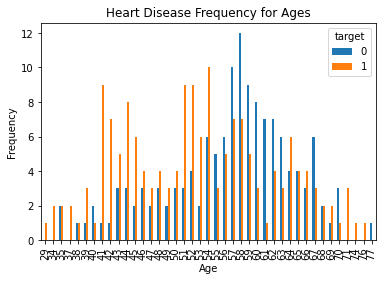

Minimum Age : 29 years
Maximum Age : 77 years


Number of Young Patients : 15
Number of Middle Aged Patients: 125
Number of Old Aged Patients : 151


In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print(f"Minimum Age : {min(df.age)} years")
print(f"Maximum Age : {max(df.age)} years")

fig = ff.create_distplot([df['age']], group_labels=['age'], show_rug=False)
fig.update_layout(title_text='Age Distribution')
fig.show()

young_patients = df[(df['age'] >= 29) & (df['age'] < 40)]
middle_aged_patients = df[(df['age'] > 40) & (df['age'] < 55)]
old_aged_patients = df[(df['age'] > 55)]

print(f"Number of Young Patients : {len(young_patients)}")
print(f"Number of Middle Aged Patients: {len(middle_aged_patients)}")
print(f"Number of Old Aged Patients : {len(old_aged_patients)}")

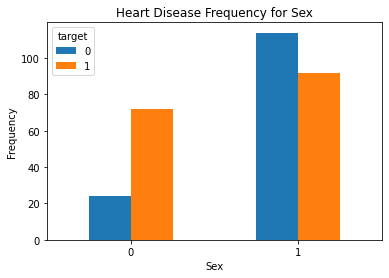

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind='bar')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

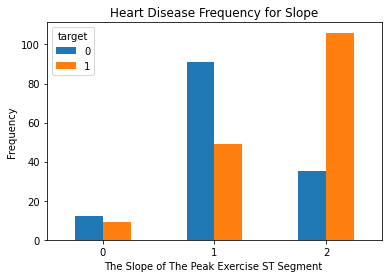

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

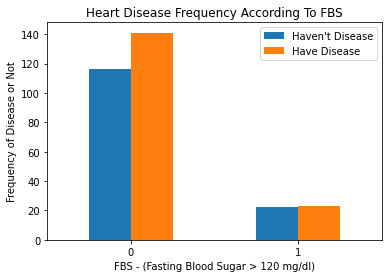

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

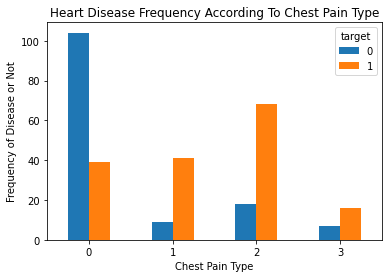

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

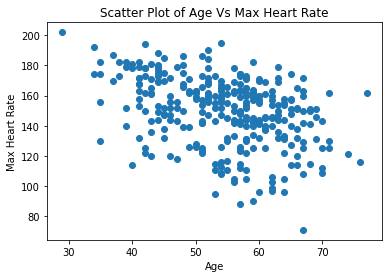

In [ ]:
plt.scatter(df.age,df.thalach)
plt.title("Scatter Plot of Age Vs Max Heart Rate")
plt.ylabel('Max Heart Rate')
plt.xlabel('Age')
plt.show()

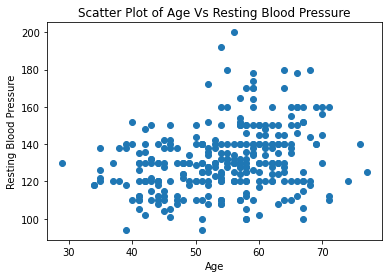

In [ ]:
plt.scatter(df.age,df.trestbps)
plt.title("Scatter Plot of Age Vs Resting Blood Pressure")
plt.ylabel('Resting Blood Pressure')
plt.xlabel('Age')
plt.show()

In [ ]:
fig = ff.create_distplot([df['trestbps']], group_labels=['trestbps'], show_rug=False)
fig.update_layout(title_text='Resting Blood Pressure Distribution')
fig.show()

print(f"Maximum Resting Blood Pressure : {df['trestbps'].max()}")
print(f"Minimum Resting Blood Pressure : {df['trestbps'].min()}")

Maximum Resting Blood Pressure : 200
Minimum Resting Blood Pressure : 94


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



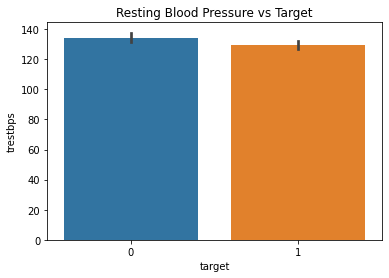

In [ ]:
sns.barplot(df.target, df.trestbps)
plt.title('Resting Blood Pressure vs Target')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



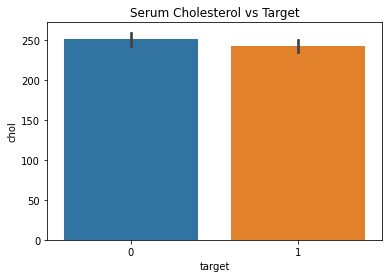

Maximum Serum Cholesterol : 564
Minimum Serum Cholesterol : 126


In [ ]:
fig = ff.create_distplot([df['chol']], group_labels=['chol'], show_rug=False)
fig.update_layout(title_text='Serum Cholesterol Distribution')
fig.show()

sns.barplot(df.target, df.chol)
plt.title('Serum Cholesterol vs Target')
plt.show()

print(f"Maximum Serum Cholesterol : {df['chol'].max()}")
print(f"Minimum Serum Cholesterol : {df['chol'].min()}")

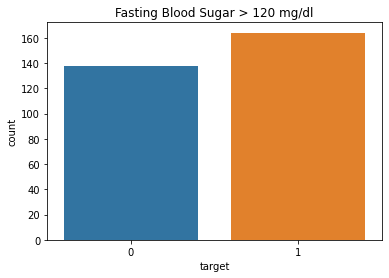

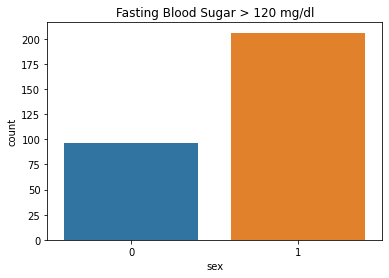

In [ ]:
sns.countplot(x ='target',data = df)
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.show()

sns.countplot(x ='sex',data = df)
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.show()

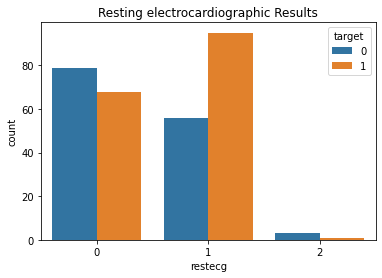

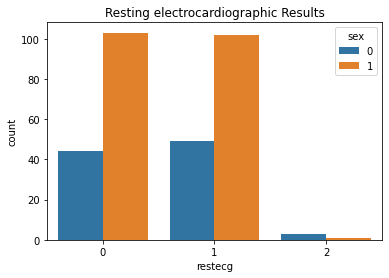

In [ ]:
sns.countplot(x='restecg', data = df, hue='target')
plt.title('Resting electrocardiographic Results')
plt.show()

sns.countplot(x='restecg', data = df, hue='sex')
plt.title('Resting electrocardiographic Results')
plt.show()

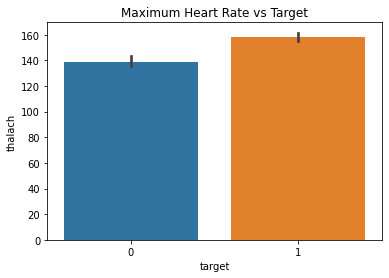

Maximum Max Heart Rate : 202
Minimum Max Heart Rate: 71


In [ ]:
fig = ff.create_distplot([df['thalach']], group_labels=['thalach'], show_rug=False)
fig.update_layout(title_text='Maximum Blood Pressure Distribution')
fig.show()

sns.barplot(x="target", y='thalach',data = df)
plt.title('Maximum Heart Rate vs Target')
plt.show()

print(f"Maximum Max Heart Rate : {df['thalach'].max()}")
print(f"Minimum Max Heart Rate: {df['thalach'].min()}")

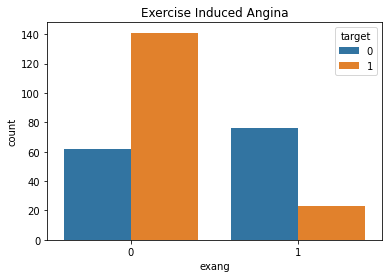

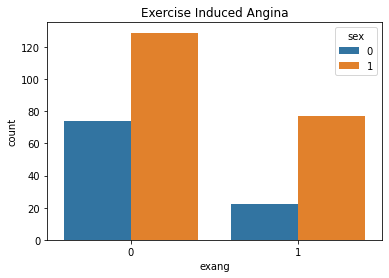

In [ ]:
sns.countplot(x='exang', hue ='target', data = df)
plt.title('Exercise Induced Angina')
plt.show()

sns.countplot(x = 'exang', hue ='sex', data = df)
plt.title('Exercise Induced Angina')
plt.show()

In [ ]:
fig = ff.create_distplot([df['oldpeak']], group_labels=['oldpeak'], show_rug=False)
fig.update_layout(title_text='ST Depression Distribution')
fig.show()

print(f"Maximum Depression : {df['oldpeak'].max()}")
print(f"Minimum Depression : {df['oldpeak'].min()}")

Maximum Depression : 6.2
Minimum Depression : 0.0


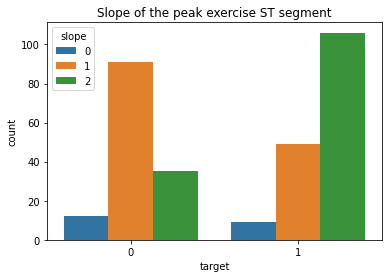

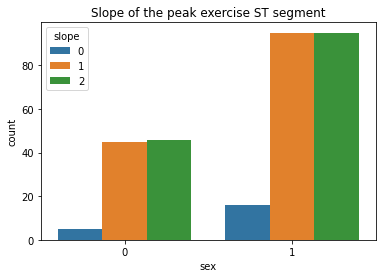

In [ ]:
sns.countplot(hue='slope',x ='target',data = df)
plt.title('Slope of the peak exercise ST segment')
plt.show()

sns.countplot(hue='slope',x ='sex',data = df)
plt.title('Slope of the peak exercise ST segment')
plt.show()

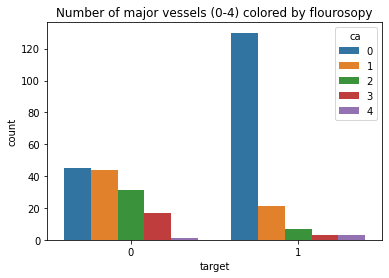

In [ ]:
sns.countplot(hue='ca',x ='target',data = df)
plt.title('Number of major vessels (0-4) colored by flourosopy')
plt.show()

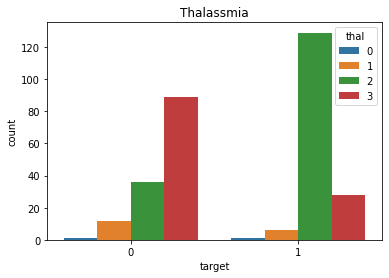

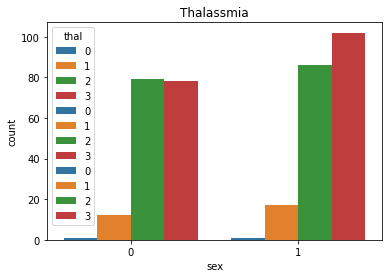

In [ ]:
sns.countplot(hue='thal',x ='target',data = df)
plt.title('Thalassmia')
plt.show()

sns.countplot(x="cp", hue="thal", data=df)

sns.countplot(x="slope", hue="thal", data=df)

sns.countplot(hue='thal',x ='sex',data = df)
plt.title('Thalassmia')
plt.show()

Feature Selection

From our EDA, we can see that a few variables do not have high correlation, so we can now perform feature extraction.

In [ ]:
x_data = df[['age','sex','cp','restecg','thalach','exang','oldpeak','slope','thal']].values
y_data = df[['target']].values

<h3>Splitting dataset</h3>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2)

<h3>Normalizing dataset</h3>

In [ ]:
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
df_x_train = pd.DataFrame(x_train, columns=['age','sex','cp','restecg','thalach','exang','oldpeak','slope','thal'])
df_x_train

age  sex        cp  restecg  ...  exang   oldpeak  slope      thal
0    0.666667  1.0  0.000000      0.5  ...    0.0  0.000000    1.0  1.000000
1    0.479167  1.0  0.666667      0.5  ...    0.0  0.080645    1.0  1.000000
2    0.729167  1.0  0.000000      0.0  ...    0.0  0.322581    0.5  0.333333
3    0.625000  1.0  1.000000      0.0  ...    0.0  0.677419    0.0  1.000000
4    0.604167  0.0  0.000000      0.0  ...    1.0  0.451613    0.5  0.333333
..        ...  ...       ...      ...  ...    ...       ...    ...       ...
236  0.854167  1.0  0.000000      0.5  ...    1.0  0.419355    0.0  1.000000
237  0.125000  1.0  0.000000      0.5  ...    1.0  0.258065    0.5  1.000000
238  0.583333  0.0  0.000000      0.0  ...    0.0  0.000000    1.0  0.666667
239  0.500000  1.0  0.666667      0.0  ...    0.0  0.000000    1.0  0.666667
240  0.687500  0.0  0.000000      0.0  ...    0.0  0.193548    0.5  0.666667

[241 rows x 9 columns]

In [ ]:
df_x_test = pd.DataFrame(x_test, columns=['age','sex','cp','restecg','thalach','exang','oldpeak','slope','thal'])
df_x_test

age  sex        cp  restecg  ...  exang   oldpeak  slope      thal
0   0.625000  1.0  0.666667      0.5  ...    0.0  0.354839    0.5  0.333333
1   0.583333  1.0  0.000000      0.5  ...    1.0  0.241935    0.5  0.333333
2   0.687500  0.0  0.000000      0.5  ...    0.0  0.306452    0.5  0.666667
3   0.625000  1.0  0.333333      0.5  ...    1.0  0.000000    1.0  0.666667
4   0.104167  0.0  0.333333      0.5  ...    0.0  0.112903    1.0  0.666667
..       ...  ...       ...      ...  ...    ...       ...    ...       ...
56  0.458333  1.0  0.000000      0.5  ...    1.0  0.677419    0.5  1.000000
57  0.812500  1.0  0.000000      0.5  ...    0.0  0.548387    0.5  1.000000
58  0.562500  1.0  0.333333      0.0  ...    0.0  0.000000    1.0  1.000000
59  0.520833  0.0  0.666667      0.5  ...    0.0  0.000000    1.0  0.666667
60  0.416667  1.0  0.666667      0.0  ...    0.0  0.129032    1.0  0.666667

[61 rows x 9 columns]

In [ ]:
Accuracy = []

In [ ]:
epoch = 4000
alpha = 0.3

<h3>Using Logistic Regression</h3>

In [ ]:
class LogisticRegression:

    def __init__(self):
      pass

    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for i in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= (lr * dot(X.T,  (y_hat - y.T).T) / N).reshape(-1,)  
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i >= 0.5 else 0 for i in self.sigmoid(z)]

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train, epochs=epoch, lr=alpha)
y_pred = model.predict(x_test)
acc_log_reg = accuracy_score(y_pred, y_test) * 100
print(f'Logistic Regression Accuracy: {acc_log_reg:.2f}%')
Accuracy.append(acc_log_reg)

Logistic Regression Accuracy: 80.33%


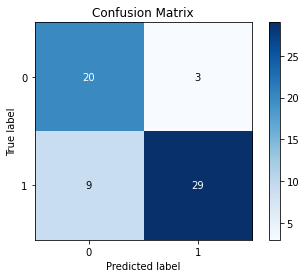

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

<h3>Using Single Layer Perceptron</h3>

In [ ]:
weight = np.random.normal(size=(9,1))
bias = np.random.normal(size=1)

In [ ]:
def feed_forward(input):
    y = np.matmul(input, weight) + bias
    return activation(y) 

In [ ]:
def activation(y):
    return 1 if y >= 0 else 0

In [ ]:
y_pred = []

for i in range(1, epoch + 1):
    randIndex = np.random.randint(0, len(x_train))
    train_data = x_train[randIndex]
    predict_result = feed_forward(train_data)

    error = predict_result - y_train[randIndex]

    # Update Weight
    weight = weight - (np.array(train_data).reshape(9, 1) * alpha * error)
    
    # Update Bias
    bias  = bias - (alpha * error)

    
# Testing
correct_result = 0
for j, test_data in enumerate(x_test):
    test_output = feed_forward(test_data)
    y_pred.append(test_output)
    if test_output == y_test[j]:
        correct_result += 1

acc_slp = correct_result/len(x_test) * 100        
print(f"Single Layer Perceptron Accuracy: {acc_slp: .2f}%")
Accuracy.append(acc_slp)

Single Layer Perceptron Accuracy:  60.66%


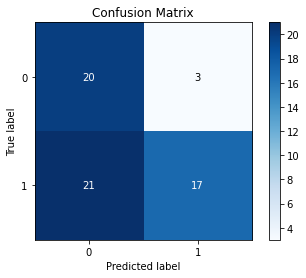

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

<h3>Using SVM</h3>

In [ ]:
model = LinearSVC(max_iter=epoch)
model.fit(x_train,y_train)
acc_svm = model.score(x_test,y_test) * 100
y_pred = model.predict(x_test)
print(f'SVM Classifier Accuracy: {acc_svm:.2f}%')
Accuracy.append(acc_svm)

SVM Classifier Accuracy: 81.97%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



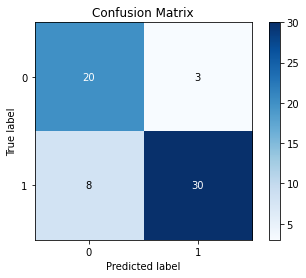

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

<h3>Using Multinomial Naive Bayes</h3>

In [ ]:
model = MultinomialNB(alpha=alpha)
model.fit(x_train, y_train)
acc_mnb = model.score(x_test,y_test) * 100
y_pred = model.predict(x_test)
print(f'Multinomial Naive Bayes Accuracy: {acc_mnb:.2f}%')
Accuracy.append(acc_mnb)

Multinomial Naive Bayes Accuracy: 90.16%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



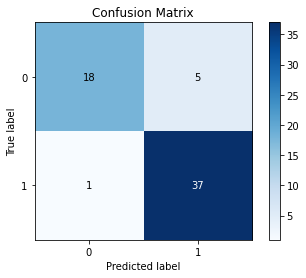

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

<h3>Using Random Forest Classifier</h3>

In [ ]:
model = RandomForestClassifier(criterion = 'entropy', max_features='log2')
model.fit(x_train, y_train)
acc_rfc = model.score(x_test,y_test) * 100
y_pred = model.predict(x_test)
print(f'Random Forest Classifier Accuracy: {acc_rfc:.2f}%')
Accuracy.append(acc_rfc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Classifier Accuracy: 80.33%


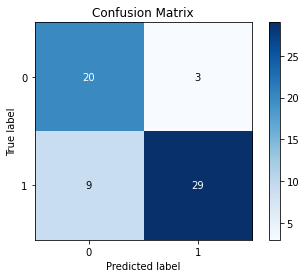

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

<h3>Using K-Nearest Neighbors</h3>

First we need to find the best value of K<br>
Here we tried to check the accuracy of K in range 1 to 50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was pa

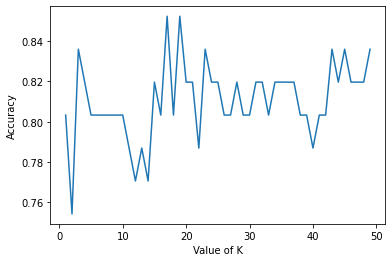

Best Score: 0.8524590163934426
Best K: 17


In [ ]:
Krange = range(1,50)
scores = {}
scores_list = []
best_score = 0
for k in Krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = accuracy_score(y_test,y_pred)
    if scores[k] > best_score:
      best_score = scores[k]
      best_k = k
    scores_list.append(accuracy_score(y_test,y_pred))
    
plt.plot(Krange,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()
print(f'Best Score: {best_score}')
print(f'Best K: {best_k}')

From the testing above we can see that we obtained the highest accuracy using K = 17

In [ ]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train, y_train)
acc_knn = model.score(x_test,y_test) * 100
y_pred = model.predict(x_test)
print(f'K-Nearest Neighbor Accuracy: {acc_knn:.2f}%')
Accuracy.append(acc_knn)

K-Nearest Neighbor Accuracy: 85.25%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



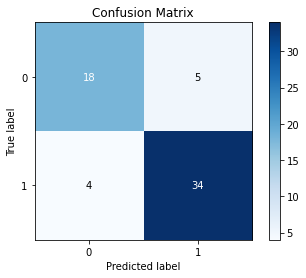

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

<h3>Compare the Accuracy of all the Classifiers to find the best Classifier</h3>

In [ ]:
Models = ['Logistic Regression','Single Layer Perceptron','SVM Classifier','Multinomial NB','Random Forest Classifier','K-Nearest Neighbors']
total = list(zip(Models,Accuracy))
output = pd.DataFrame(total, columns = ['Models','Accuracy'])

s = output.groupby(['Models'])['Accuracy'].mean().reset_index().sort_values(by='Accuracy',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

From the accuracy list shown above, we can see which model has the highest accuracy and from our findings, the model with the highest accuracy would be by using the Multinomial Naive Bayes model.